### Scipy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
max_temp = np.array ([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0, 0.5, 'Min and Max Temperatures')

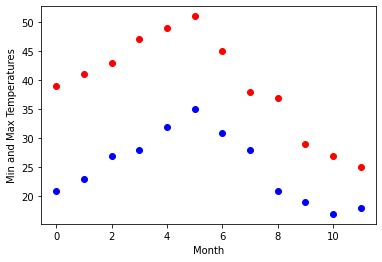

In [3]:
months = np.arange(12)
plt.plot(months,max_temp,'ro')
plt.plot(months,min_temp,'bo')
plt.xlabel('Month')
plt.ylabel('Min and Max Temperatures')

In [4]:
# Fitting it into a Periodic Function
from scipy import optimize

def yearly_temp(times, avg , ampl , time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temp, months,
                                      max_temp, [20, 10, 0])

res_min, cov_min = optimize.curve_fit(yearly_temp, months,
                                      min_temp, [-40, 20, 0])

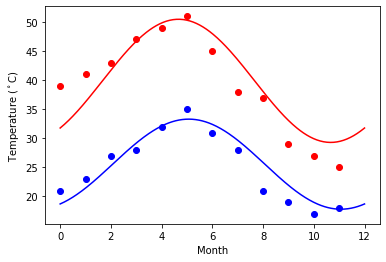

In [5]:
days = np.linspace(0,12,num=365)
plt.figure()
plt.plot(months,max_temp,'ro')
plt.plot(days,yearly_temp(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, yearly_temp(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

### Matplotlib

In [6]:
import matplotlib.patches as mpatches

In [7]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [8]:
data = titanic[['age','fare','sex']].dropna()
data

,age,fare,sex
0,29.0000,211.3375,female
1,0.9167,151.5500,male
2,2.0000,151.5500,female
3,30.0000,151.5500,male
4,25.0000,151.5500,female
...,...,...,...
1301,45.5000,7.2250,male
1304,14.5000,14.4542,female
1306,26.5000,7.2250,male
1307,27.0000,7.2250,male


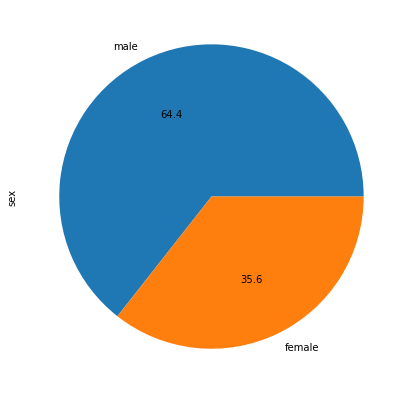

In [9]:
#1
titanic['sex'].value_counts().plot.pie(y='Sex', figsize=(7,7), autopct = '%.1f')

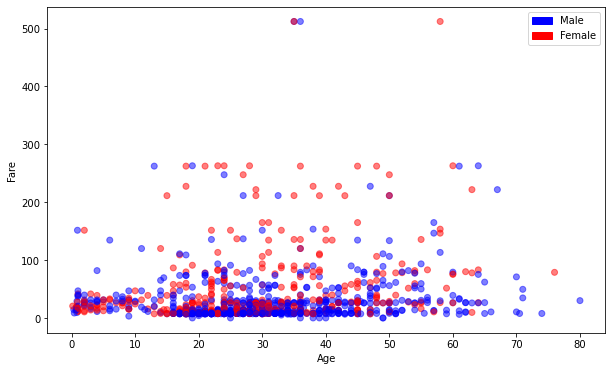

In [10]:
#2
fig, ax = plt.subplots(figsize=(10,6))

colordict = {'female':'r', 'male':'b'}

df = pd.DataFrame()
df['color'] = data['sex'].apply(lambda x: colordict[x])
    
ax.scatter(data['age'], data['fare'], c= df['color'], alpha=0.5)

ax.set_xlabel('Age')
ax.set_ylabel('Fare')

male = mpatches.Patch(color='b', label='Male')
female = mpatches.Patch(color='r', label='Female')

plt.legend(handles=[male,female])

plt.show()